## 0 | Import packages

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from utilities import importFile, openFile, openHDF5file, getLooseRseal
from tkinter.filedialog import askopenfilename, askopenfilenames
from collections import defaultdict
from nptdms import TdmsFile
from scipy import stats
from scipy.signal import find_peaks
print("done!")

done!


## 1 | Find spikes in one sweep after cutting the test_pulse (deprecated)

First of all, we load an example cell to work with:

In [2]:
# Load data
channels_data_frame_1, time_1, dt_1, folder_name_1, file_name_1 = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

file imported


In [3]:
# Inspect data frame
channels_data_frame_1

13  \
Channel A  [1.1889297824046958, 1.253328465971537, 1.2533...   
Channel B  [-20.310042374699133, -20.632035761040658, -18...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          14  \
Channel A  [1.2855278078017005, 1.2211291241725364, 1.221...   
Channel B  [-3.8883792610270644, -10.97223403629284, -12....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          15  \
Channel A  [1.2855278078017005, 1.2211291241725364, 1.253...   
Channel B  [-0.6684452226398963, -0.9904386278756757, -5....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          16  \
Channel A  [1.253328465971537, 1.1889297824046958, 1.2533...   
Channel B  [15.431225435651891, 10.923317572881103, 8.347...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          17  \
Channel A  [1.2211291241725364, 1.2211291241725364, 1.221...   
Channel B  [14.143251754340366, 8.025376836201604, 7.7033...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          18  \
Channel A  [1.2211291241725364, 1.2855278078017005, 1.382...   
Channel B  [1.2635152152973421, 2.873482255456038, 1.5855...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          19  \
Channel A  [1.1889297824046958, 1.349926491555527, 1.2211...   
Channel B  [2.873482255456038, 2.873482255456038, 5.77142...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          20  \
Channel A  [1.2211291241725364, 1.2211291241725364, 1.253...   
Channel B  [11.889297824046958, 13.821258334791953, 19.93...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          21  \
Channel A  [1.253328465971537, 1.3821258334791953, 1.2533...   
Channel B  [26.379001928434015, 33.140864060409456, 34.10...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          22  ...  \
Channel A  [0.5127436124734345, 0.5127436124734345, 0.480...  ...   
Channel B  [-23.52997622421571, -21.92000930331773, -25.7...  ...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   

                                                          39  \
Channel A  [1.1889297824046958, 1.1567304406680132, 1.188...   
Channel B  [-1.9564188417199486, -3.2443924558328088, -3....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          40  \
Channel A  [1.1567304406680132, 1.1567304406680132, 1.221...   
Channel B  [7.3813900092529385, 9.313350493834292, 8.3473...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          41  \
Channel A  [1.1567304406680132, 1.1889297824046958, 1.253...   
Channel B  [10.923317572881103, 5.127436124734345, -0

To check how to navigate pandas dataframes go to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.flags.html or check testpulse_Rseal notebook. Some commands in the following cell.


In [4]:
# pandas.DataFrame.at - Access a single value for a row/column label pair.
print(channels_data_frame_1.at['Channel A', '13'])
print(channels_data_frame_1.iat[0,0])

# pandas.DataFrame.columns - The column labels of the DataFrame.
print(channels_data_frame_1.columns)

# pandas.DataFrame.index - The index (row labels) of the DataFrame.
print(channels_data_frame_1.index)

# pandas.DataFrame.shape - Return a tuple representing the dimensionality of the DataFrame.
print(channels_data_frame_1.shape)

# pandas.DataFrame.loc - Access a group of rows and columns by label(s) or a boolean array.
print(channels_data_frame_1.loc[['Channel A', 'Channel B'],:])
print(channels_data_frame_1.loc[['Channel A'], :])

# pandas.DataFrame.iloc - Purely integer-location based indexing for selection by position.
print(channels_data_frame_1.iloc[0, :])

[1.18892978 1.25332847 1.25332847 ... 1.15673044 1.22112912 1.1245311 ]
[1.18892978 1.25332847 1.25332847 ... 1.15673044 1.22112912 1.1245311 ]
Index(['13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48'],
      dtype='object')
Index(['Channel A', 'Channel B', 'Output A', 'Output B'], dtype='object')
(4, 36)
                                                          13  \
Channel A  [1.1889297824046958, 1.253328465971537, 1.2533...   
Channel B  [-20.310042374699133, -20.632035761040658, -18...   

                                                          14  \
Channel A  [1.2855278078017005, 1.2211291241725364, 1.221...   
Channel B  [-3.8883792610270644, -10.97223403629284, -12....   

                                                          15  \
Channel A  [1.2855278078017005, 1.2211291241725364, 1.253...   


### 1.1 | Find `test_pulse` indices so you can ignore it from analysis (deprecated)

__Protocols used:__

 - OP_VC_clear:
    - Sweep duration: 4950ms
    - Sweep interval: 50ms
    - Test pulse: 100ms (50ms delay and 50ms pulse)
    - Real data per sweep: 4850ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 5100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 5025ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 10100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 10025ms

NOTE: I initially was going to follow this strategy, but eventually found that you can use `find_peaks` successfully even if the `test_pulse` is present by setting the parameter `wlen`.

#### 1.1.1 Load one sweep and visualise it

In [5]:
sweep_IA_1 = np.array(channels_data_frame_1.at['Channel A', '13'])
sweep_IB_1 = np.array(channels_data_frame_1.at['Channel B', '13'])
sweep_OA_1 = np.array(channels_data_frame_1.at['Output A', '13'])
print('done')

done


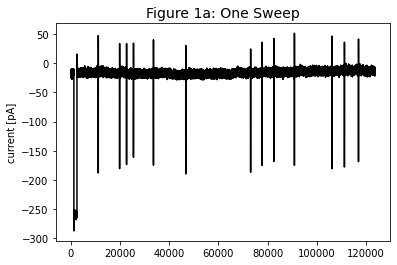

In [7]:
%matplotlib inline
# matplotlib tk
 
plt.figure(1)
plt.plot(sweep_IB_1, 'k')
plt.title('Figure 1a: One Sweep', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

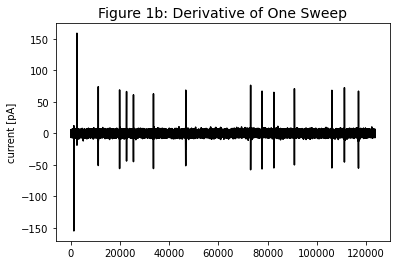

In [8]:
%matplotlib inline
# matplotlib tk

plt.figure(1)
plt.plot(np.diff(sweep_IB_1), 'k')
plt.title('Figure 1b: Derivative of One Sweep', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

#### 1.1.2 Get the test_pulse indices from Output A to remove the epochs where voltage is injected from analysis

We want to find the indices that allow us to remove the bit of recording where the test_pulse is on, so that we are left with a "flat" recording.

In [9]:
test_pulse_1 = np.where(sweep_OA_1 < 0)
test_pulse_OA_indices_1 = test_pulse_1[0]
print(test_pulse_OA_indices_1)

[1250 1251 1252 ... 2496 2497 2498]


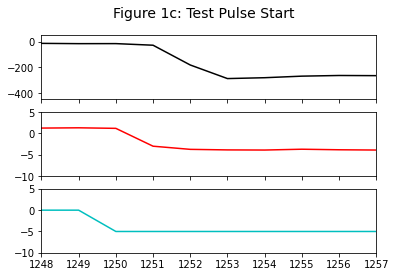

In [11]:
%matplotlib inline
# matplotlib tk

# Note how there is a further delay for the channel B (top)
fig, axs = plt.subplots (3, sharex=True)
axs[0].plot(sweep_IB_1, 'k')
axs[0].axis([test_pulse_OA_indices_1[0]-2, test_pulse_OA_indices_1[7], -450, 50])
axs[1].plot(sweep_IA_1, 'r')
axs[1].axis([test_pulse_OA_indices_1[0]-2, test_pulse_OA_indices_1[7], -10, 5])
axs[2].plot(sweep_OA_1, 'c')
axs[2].axis([test_pulse_OA_indices_1[0]-2, test_pulse_OA_indices_1[7], -10, 5])
fig.suptitle('Figure 1c: Test Pulse Start', fontsize = 14)
plt.show()

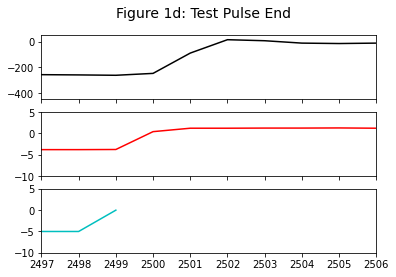

In [12]:
%matplotlib inline
# matplotlib tk

# Note how there is a further delay for the channel B (top)
fig, axs = plt.subplots (3, sharex=True)
axs[0].plot(sweep_IB_1, 'k')
axs[0].axis([test_pulse_OA_indices_1[-2], test_pulse_OA_indices_1[-1]+8, -450, 50])
axs[1].plot(sweep_IA_1, 'r')
axs[1].axis([test_pulse_OA_indices_1[-2], test_pulse_OA_indices_1[-1]+8, -10, 5])
axs[2].plot(sweep_OA_1, 'c')
axs[2].axis([test_pulse_OA_indices_1[-2], test_pulse_OA_indices_1[-1]+8, -10, 5])
fig.suptitle('Figure 1d: Test Pulse End', fontsize = 14)
plt.show()

#### 1.1.3 Use the indices to remove the test_pulse from the trace


In [13]:
test_pulse_OA_indices_1

array([1250, 1251, 1252, ..., 2496, 2497, 2498], dtype=int64)

In [14]:
# Get the index where the test pulse begins, accounting for the delay between the output channel and the recording
test_pulse_IB_start_1 = test_pulse_OA_indices_1[0] + 1
print(test_pulse_IB_start_1)
test_pulse_IB_end_1 = test_pulse_OA_indices_1[-1] + 5
print(test_pulse_IB_end_1)

1251
2503


In [15]:
# Translate the test_pulse indices from the output channel to the recording channel
test_pulse_IB_indices_1 = np.arange(test_pulse_IB_start_1, test_pulse_IB_end_1)
# Delete the indices where the test pulse is on
sweep_IB_no_testpulse_1 = np.delete(sweep_IB_1, test_pulse_IB_indices_1)

print(len(sweep_IB_1))
print(len(test_pulse_IB_indices_1))
print(len(sweep_IB_no_testpulse_1))

sweep_IB_no_testpulse_1

123750
1252
122498


array([-20.31004237, -20.63203576, -18.70007544, ..., -15.80213493,
       -14.51416137, -15.15814815])

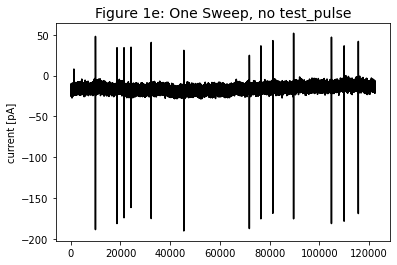

In [16]:
%matplotlib inline
# matplotlib tk

plt.figure(1)
plt.plot(sweep_IB_no_testpulse_1, 'k')
plt.title('Figure 1e: One Sweep, no test_pulse', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

### 1.2 | Find spikes with a simple threshold

In [17]:
# Try to find spikes with a simple manual threshold
np.where(sweep_IB_1 < (-50)) # detects indices where test_pulse is on

(array([  1252,   1253,   1254, ..., 116972, 116973, 116974], dtype=int64),)

In [18]:
# Try to find spikes with a simple manual threshold
np.where(sweep_IB_no_testpulse_1 < (-50)) # now only detects spikes and noise

(array([  9920,   9921,   9922,   9923,   9924,   9925,  18590,  18591,
         18592,  18593,  18594,  18595,  21416,  21417,  21418,  21419,
         21420,  21421,  24227,  24228,  24229,  24230,  24231,  24232,
         32357,  32358,  32359,  32360,  32361,  32362,  45484,  45485,
         45486,  45487,  45488,  45489,  71860,  71861,  71862,  71863,
         71864,  71865,  76501,  76502,  76503,  76504,  76505,  76506,
         81319,  81320,  81321,  81322,  81323,  89667,  89668,  89669,
         89670,  89671,  89672, 104901, 104902, 104903, 104904, 104905,
        109998, 109999, 110000, 110001, 110002, 110003, 115718, 115719,
        115720, 115721, 115722], dtype=int64),)

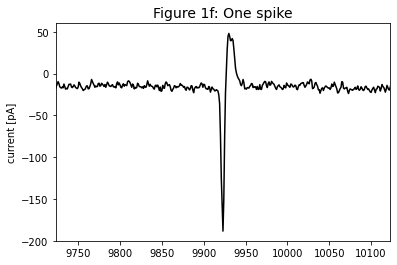

In [19]:
%matplotlib inline
# matplotlib tk

# Zoom in on one of the detected spikes
plt.figure(1)
plt.plot(sweep_IB_no_testpulse_1, 'k')
plt.axis([(9923-200), (9923+200), -200, 60])
plt.title('Figure 1f: One spike', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

This aproach seems to work. However, it is not very useful as we would need to manually set a threshold for each cell depending on how big the spikes are. And in some cases, spike amplitude changes along the recording. In addition, we need to cut a chunk of the sweep to remove the test_pulse - by having a loose-seal we have a response to the test_pulse that is usually bigger than the spikes we measure. This is a problem in the cases where we have a spike either before the test_pulse or during the test_pulse. In the first case, by cutting a chunk we will be making the ISI between that spike and the next inaccurate, whereas in the second case we will miss the spike altogether. So let's find another way without reinventing the wheel.

In [20]:
# Side note: this is something Tiago uses to find spikes in NeuroDAQ
comp = lambda a, b: a < b
comp(2, 2)

False

## 2 | Use find_peaks() from scipy to detect spikes in a sweep with the test_pulse removed

In [ ]:
# from scipy.signal import find_peaks
# help(find_peaks)

We can use find_peaks to detect spikes. We reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid most of the noise.

find_peaks allows us to use different parameters. Objectively, the size of the spikes may differ accross sweeps and neurons, so it is hard to establish a hard value for it.

* height: Required height of peaks. Either a number, ``None``, an array matching `x` or a 2-element sequence of the former. The first element is always interpreted as the  minimal and the second, if supplied, as the maximal required height.
* threshold: Required threshold of peaks, the vertical distance to its neighboring samples. Either a number, ``None``, an array matching `x` or a 2-element sequence of the former. The first element is always interpreted as the  minimal and the second, if supplied, as the maximal required threshold.
* distance: Required minimal horizontal distance (>= 1) in samples between neighbouring peaks. Smaller peaks are removed first until the condition is fulfilled for all remaining peaks.
* prominence: Required prominence of peaks. Either a number, ``None``, an array matching `x` or a 2-element sequence of the former. The first element is always interpreted as the minimal and the second, if supplied, as the maximal required prominence.

To calculate and return properties without excluding peaks, provide the open interval ``(None, None)`` as a value to the appropriate argument (excluding `distance`). 

The conditions are evaluated in the following order: `plateau_size`, `height`, `threshold`, `distance`, `prominence`, `width`. In most cases this order is the fastest one because faster operations are applied first to reduce the number of peaks that need to be evaluated later.

The function returns the indices of peaks that satisfy all conditions and different properties like `peak_heights`, `left_thresholds`, `prominences` (and the indices for its bases), and `width_heights`.

First of all, let's re-load an example cell to avoid cross-talk with any code we have run before

In [21]:
# Load data
channels_data_frame_2, time_2, dt_2, folder_name_2, file_name_2 = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

file imported


In [22]:
# Inspect data frame
channels_data_frame_2

13  \
Channel A  [1.1889297824046958, 1.253328465971537, 1.2533...   
Channel B  [-20.310042374699133, -20.632035761040658, -18...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          14  \
Channel A  [1.2855278078017005, 1.2211291241725364, 1.221...   
Channel B  [-3.8883792610270644, -10.97223403629284, -12....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          15  \
Channel A  [1.2855278078017005, 1.2211291241725364, 1.253...   
Channel B  [-0.6684452226398963, -0.9904386278756757, -5....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          16  \
Channel A  [1.253328465971537, 1.1889297824046958, 1.2533...   
Channel B  [15.431225435651891, 10.923317572881103, 8.347...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          17  \
Channel A  [1.2211291241725364, 1.2211291241725364, 1.221...   
Channel B  [14.143251754340366, 8.025376836201604, 7.7033...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          18  \
Channel A  [1.2211291241725364, 1.2855278078017005, 1.382...   
Channel B  [1.2635152152973421, 2.873482255456038, 1.5855...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          19  \
Channel A  [1.1889297824046958, 1.349926491555527, 1.2211...   
Channel B  [2.873482255456038, 2.873482255456038, 5.77142...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          20  \
Channel A  [1.2211291241725364, 1.2211291241725364, 1.253...   
Channel B  [11.889297824046958, 13.821258334791953, 19.93...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          21  \
Channel A  [1.253328465971537, 1.3821258334791953, 1.2533...   
Channel B  [26.379001928434015, 33.140864060409456, 34.10...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          22  ...  \
Channel A  [0.5127436124734345, 0.5127436124734345, 0.480...  ...   
Channel B  [-23.52997622421571, -21.92000930331773, -25.7...  ...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   

                                                          39  \
Channel A  [1.1889297824046958, 1.1567304406680132, 1.188...   
Channel B  [-1.9564188417199486, -3.2443924558328088, -3....   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          40  \
Channel A  [1.1567304406680132, 1.1567304406680132, 1.221...   
Channel B  [7.3813900092529385, 9.313350493834292, 8.3473...   
Output A   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Output B   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                          41  \
Channel A  [1.1567304406680132, 1.1889297824046958, 1.253...   
Channel B  [10.923317572881103, 5.127436124734345, -0

We also replicate the bit to remove the test_pulse from the sweep

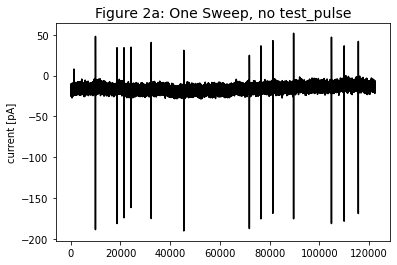

In [23]:
# Load sweeps
sweep_IA_2 = np.array(channels_data_frame_2.at['Channel A', '13'])
sweep_IB_2 = np.array(channels_data_frame_2.at['Channel B', '13'])
sweep_OA_2 = np.array(channels_data_frame_2.at['Output A', '13'])

# Find test_pulse
test_pulse_2 = np.where(sweep_OA_2 < 0)
test_pulse_OA_indices_2 = test_pulse_2[0]

# Get the index where the test pulse begins, accounting for the delay between the output channel and the recording
test_pulse_IB_start_2 = test_pulse_OA_indices_2[0] + 1
test_pulse_IB_end_2 = test_pulse_OA_indices_2[-1] + 5

# Translate the test_pulse indices from the output channel to the recording channel
test_pulse_IB_indices_2 = np.arange(test_pulse_IB_start_2, test_pulse_IB_end_2)
# Delete the indices where the test pulse is on
sweep_IB_no_testpulse_2 = np.delete(sweep_IB_2, test_pulse_IB_indices_2)

# Plot it
%matplotlib inline
# matplotlib tk

plt.figure(1)
plt.plot(sweep_IB_no_testpulse_2, 'k')
plt.title('Figure 2a: One Sweep, no test_pulse', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

### 2.1 | See how `find_peaks` works by running it on one sweep

We can run the function with all parameters set to `None`. This will extract a series of properties we can use to fine-tune the spike detection.

In [24]:
peaks_2, properties_2 = find_peaks(-sweep_IB_no_testpulse_2, height = (None, None), threshold = (None, None), distance = None, prominence = (None, None), width = (None, None))
# Reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid the noise.
print(len(peaks_2))
peaks_2

29995


array([     1,      5,     12, ..., 122488, 122491, 122495], dtype=int64)

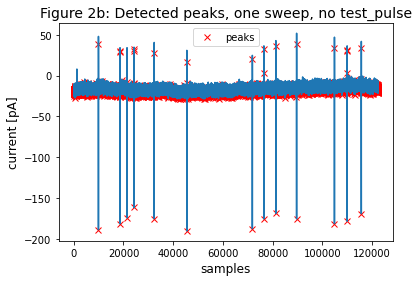

In [25]:
%matplotlib inline
# matplotlib tk
 
plt.plot(peaks_2, sweep_IB_no_testpulse_2[peaks_2], "xr"); plt.plot(sweep_IB_no_testpulse_2); plt.legend(['peaks'])
plt.title('Figure 2b: Detected peaks, one sweep, no test_pulse', fontsize = 14)
plt.xlabel('samples', fontsize = 12)
plt.ylabel('current [pA]', fontsize = 12)
plt.show()

We can see that it detects pretty much anything. Let's take a look at the different properties we can use to narrow down the spike detection.

In [26]:
properties_2

{'peak_heights': array([20.63203576, 18.05608866, 16.7681151 , ..., 13.54818119,
        14.83615476, 15.80213493]),
 'left_thresholds': array([0.32199339, 1.93196034, 0.32199339, ..., 1.60996697, 0.32199339,
        1.93196035]),
 'right_thresholds': array([1.93196032, 0.        , 0.32199339, ..., 0.64398679, 1.28797357,
        1.28797357]),
 'prominences': array([0.32199339, 2.25395373, 0.32199339, ..., 0.64398679, 2.89794054,
        1.28797357]),
 'left_bases': array([     0,      3,     10, ..., 122487, 122487, 122493], dtype=int64),
 'right_bases': array([     3,     10,     13, ..., 122489, 122493, 122496], dtype=int64),
 'widths': array([0.58333333, 3.95833333, 1.        , ..., 0.7       , 2.72777778,
        0.83333333]),
 'width_heights': array([20.47103907, 16.9291118 , 16.60711841, ..., 13.2261878 ,
        13.38718449, 15.15814815]),
 'left_ips': array([5.00000000e-01, 4.41666667e+00, 1.15000000e+01, ...,
        1.22487800e+05, 1.22489300e+05, 1.22494667e+05]),
 'right_i

In [27]:
print(properties_2['prominences'])
print(max(properties_2['prominences']))
print(np.mean(properties_2['prominences']))

[0.32199339 2.25395373 0.32199339 ... 0.64398679 2.89794054 1.28797357]
237.95307734149327
4.201533349878254


(array([4.20623952e-02, 1.40296839e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.82077870e-06, 8.41781031e-06]), array([  0.32199338,  24.08510178,  47.84821017,  71.61131857,
        95.37442697, 119.13753536, 142.90064376, 166.66375215,
       190.42686055, 214.18996895, 237.95307734]), <BarContainer object of 10 artists>)


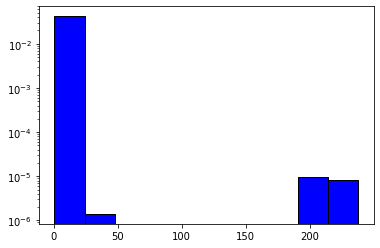

In [32]:
# hist() returns three things: the values, the bin edges, and the patches (which are the columns), and we can assign this to variables we can use to modify the plot (see next cell)
print(plt.hist(properties_2['prominences'], bins = 10, density = 1, histtype = 'bar', log = True, color = 'b', ec = 'k'))

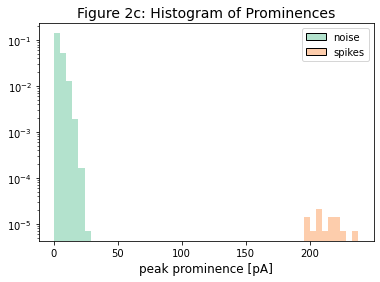

In [42]:
# Code from https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries and https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries

from matplotlib.patches import Rectangle

%matplotlib inline
# matplotlib tk

# hist() returns three things: the values, the bin edges, and the patches (which are the columns)
n_2, bins_2, patches_2 = plt.hist(properties_2['prominences'], bins = 50, density = 1, histtype = 'bar', log = True)
# Use log = True to see the smaller peak in the histogram that corresponds to the spikes

cmap_2 = plt.get_cmap('Pastel2')
noise_2 = cmap_2(0)
spikes_2 = cmap_2(1)

for i in range(0, (round(len(patches_2)/2))):
    patches_2[i].set_facecolor(noise_2)
for i in range((round(len(patches_2)/2)), (len(patches_2))):
    patches_2[i].set_facecolor(spikes_2)
    
handles = [Rectangle((0, 0), 1, 1, color = c, ec = "k") for c in [noise_2, spikes_2]]
labels= ["noise","spikes"]

plt.title('Figure 2c: Histogram of Prominences', fontsize = 14)
plt.xlabel('peak prominence [pA]', fontsize = 12)
plt.legend(handles, labels)
plt.show()

### 2.2 | Fine-tune parameters
As we can see in the histogram above, most of our detected peaks correspond to low amplitude noise in the baseline, whereas the spikes fall around 200pA prominence. We could use this plot and the summary statistics for prominences to decide the optimal spike detection approach for each neuron.

In [ ]:
print(np.mean(properties_2['prominences']))
print(np.median(properties_2['prominences']))
print(max(properties_2['prominences']))

from scipy import stats
print(stats.mode(properties_2['prominences'])[0][0]

Let's try with different prominence values: run the following cell by setting `prominence = 4` (or the value you get for the mean of all prominences) and start increasing until you surpass the first band of the histogram.

The number of peaks detected is quite high for `prominence = 4`, but it starts to decrease as we approach `prominence = 25`, after which it only detects the spikes.

In [ ]:
peaks_2b, properties_2b = find_peaks(-sweep_IB_no_testpulse_2, height = (None, None), threshold = (None, None), distance = None, prominence = 150, width = (None, None))
# Reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid the noise.
print(len(peaks_2b)) # now we have get more reasonable number
peaks_2b

In [ ]:
%matplotlib inline
# matplotlib tk

plt.plot(peaks_2b, sweep_IB_no_testpulse_2[peaks_2b], "xr"); plt.plot(sweep_IB_no_testpulse_2); plt.legend(['peaks'])
plt.title('Figure 2d: Detected peaks', fontsize = 14)
plt.xlabel('samples', fontsize = 12)
plt.ylabel('current [pA]', fontsize = 12)
plt.show()

In [ ]:
%matplotlib inline
# matplotlib tk

cmap_2 = plt.get_cmap('Pastel2')
noise_2 = cmap_2(0)
spikes_2 = cmap_2(1)

plt.hist(properties_2b['prominences'], bins = 10, density = 1, histtype = 'bar', log = False, color = spikes_2)
plt.title('Figure 2e: Prominence of detected peaks after fine-tuning', fontsize = 14)
plt.xlabel('peak prominence [pA]', fontsize = 12)
plt.xlim([0,None])
plt.show()

### 2.3 | Calculate firing frequency and ISIs from Peaks

Now this is much cleaner and detects only the spikes. Alright, get the firing rate and interspike intervals of that sweep.

In [ ]:
n_spikes_2b = len(peaks_2b)
time_recording_2b = len(sweep_IB_no_testpulse_2) * dt_2 / 1000 # in seconds
firing_frequency_2b = n_spikes_2b / time_recording_2b # in Hz
print(firing_frequency_2b)

In [ ]:
print(peaks_2b)
print(peaks_2b[0])

In [ ]:
interspike_2b = []
for p in range(len(peaks_2b)-1):
    interspike_tmp = peaks_2b[p+1] - peaks_2b[p]
    interspike_tmp_ms = interspike_tmp * dt_2
    interspike_2b.append(interspike_tmp_ms)
print(interspike_2b)

In [ ]:
plt.hist(interspike_2b, bins = 10, density = False, histtype = 'bar', log = False, color = cmap_2(2))
plt.title('Figure 2f: ISI of detected spikes', fontsize = 14)
plt.xlabel('Interspike Interval [ms]', fontsize = 12)
plt.xlim([0,None])
plt.show()

In [ ]:
instant_firing_frequency_2b = [((1/isi)*1000) for isi in interspike_2b]
iprint(nstant_firing_frequency_2b
)
print()np.mean(instant_firing_frequency_2b)print()nffiring_frequency_2b

### 2.4 | Find holding current for each spike

In [ ]:
# get baseline before and after a detected
holding_pre = np.mean(sweep_IB_no_testpulse_2[peaks_2b[0]-250 : peaks_2b[0]-50])
holding_post = np.mean(sweep_IB_no_testpulse_2[peaks_2b[0]+50 : peaks_2b[0]+250])
print(holding_pre)
print(holding_post)
np.mean([holding_pre, holding_post])

In [ ]:
# get baseline between two consecutive spikes
holding_for_isi_2b = [np.mean(sweep_IB_no_testpulse_2[peaks_2b[p]+50 : peaks_2b[p+1]-50]) for p in range(len(peaks_2b)-1)]
holding_for_isi_2b

### 2.5 | Plot ISI vs Holding

In [ ]:
len(holding_for_isi_2b) == len(interspike_2b)

In [ ]:
plt.scatter(interspike_2b, holding_for_isi_2b, label = f'Correlation = {np.round(np.corrcoef(interspike_2b,holding_for_isi_2b)[0,1], 2)}')
plt.title('Figure 2g: ISI vs Holding', fontsize = 14), plt.legend()
plt.xlabel('Interspike Interval [ms]', fontsize = 12), plt.ylabel('Holding current [pA]', fontsize = 12)
plt.show()

### 2.6 | Cut, baseline, and average detected spikes

In [ ]:
peaks_2b

In [ ]:
cut_spikes = [sweep_IB_no_testpulse_2[peaks_2b[p]-200 : peaks_2b[p]+250] for p in range(len(peaks_2b))]
len(cut_spikes)

In [ ]:
%matplotlib inline
# matplotlib tk

import matplotlib.cm as cm
spike_colors = cm.viridis(np.linspace(0, 1, len(cut_spikes)))

# Zoom in on one of the detected spikes
for s in range(len(cut_spikes)):
    plt.plot(cut_spikes[s], color = spike_colors[s])

plt.title('Figure 2h: Cut spikes', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

In [ ]:
cut_spikes_holding = [np.mean(sweep_IB_no_testpulse_2[peaks_2b[p]-250 : peaks_2b[p]-50]) for p in range(len(peaks_2b))]
cut_spikes_holding

In [ ]:
cut_spikes_baselined = [cut_spikes[i] - cut_spikes_holding[i] for i in range(len(cut_spikes))]
len(cut_spikes_baselined)

In [ ]:
%matplotlib inline
# matplotlib tk

import matplotlib.cm as cm
baselined_spikes_colors = cm.viridis(np.linspace(0, 1, len(cut_spikes_baselined)))

# Zoom in on one of the detected spikes
for s in range(len(cut_spikes_baselined)):
    plt.plot(cut_spikes_baselined[s], color = baselined_spikes_colors[s])

plt.title('Figure 2i: Cut and baselined spikes', fontsize = 14)
plt.ylabel('current [pA]')
plt.xlim([180,240])
plt.show()

In [ ]:
cut_spikes_baselined[0][0]

In [ ]:
print(len(cut_spikes_baselined))
print(len(cut_spikes_baselined[1]))

In [ ]:
average_spike = (np.mean(cut_spikes_baselined, 0))
len(average_spike)

In [ ]:
%matplotlib inline
# matplotlib tk

# Zoom in on one of the detected spikes
plt.plot(average_spike, color = 'k')
plt.title('Figure 2j: Averaged spike', fontsize = 14)
plt.ylabel('current [pA]')
plt.xlim([150,250])
plt.show()

In [ ]:
%matplotlib inline
# Zoom in on one of the detected spikes
for s in range(len(cut_spikes_baselined)):
    plt.plot(cut_spikes_baselined[s], 'k')
plt.plot(average_spike, color = 'r')
plt.title('Figure 2k: Cut spikes', fontsize = 14)
plt.ylabel('current [pA]')
plt.xlim([190,230])
plt.show()

In [ ]:
print(np.max(average_spike))
print(np.min(average_spike))
print(np.mean(average_spike[None, 150]))
midpoint = (np.min(average_spike) - np.mean(average_spike[None, 150])) / 2
print(np.where(average_spike < midpoint))

In [ ]:
cut_spikes_pair = [sweep_IB_no_testpulse_2[peaks_2b[p]-250 : peaks_2b[p+1]+100] for p in range(len(peaks_2b)-1)]
cut_spikes_pair_holding = [np.mean(sweep_IB_no_testpulse_2[peaks_2b[p]-250 : peaks_2b[p]-50]) for p in range(len(peaks_2b)-1)]
cut_spikes_pair_baselined = [cut_spikes_pair[i] - cut_spikes_pair_holding[i] for i in range(len(cut_spikes_pair))]

%matplotlib inline
# matplotlib tk

import matplotlib.cm as cm
baselined_spike_pair_colors = cm.viridis(np.linspace(0, 1, len(cut_spikes_pair_baselined)))

# Zoom in on one of the detected spikes
for s in range(len(cut_spikes_pair_baselined)):
    plt.plot(cut_spikes_pair_baselined[s], color = baselined_spike_pair_colors[s])
plt.title('Figure 2l: Cut and baselined spike pairs', fontsize = 14)
plt.ylabel('current [pA]')
#plt.xlim([180,240])
plt.show()

## 3 | Use find_peaks() to detect spikes in a sweep without removing the test_pulse
Removing the test_pulse would have the downside that we can't use the spikes detected before the test_pulse to calculate ISI, so we might as well remove everything before the end of the test_pulse. Before doing that, we can check whether `find_peaks` would work to detect spikes in the test_pulse, but not the test_pulse edges.

### 3.1 | Load data

In [ ]:
# Load data for LIAM cell (contains spikes in test_pulse)
channels_data_frame_3, time_3, dt_3, folder_name_3, file_name_3 = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

In [ ]:
# Inspect data frame
channels_data_frame_3

In [ ]:
# Extract sweep
sweep_IB_3 = np.array(channels_data_frame_3.at['Channel B', '30'])

# Plot it
%matplotlib inline
# matplotlib tk

plt.figure(1)
plt.plot(sweep_IB_3, 'k')
plt.title('Figure 3a: One Sweep', fontsize = 14)
plt.ylabel('current [pA]')
plt.show()

### 3.2 | Use find_peaks to detect spikes

In [ ]:
peaks_3, properties_3 = find_peaks(-sweep_IB_3, height = (None, None), threshold = (None, None), distance = None, prominence = (None, None), width = (None, None))
# Reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid the noise.
print(len(peaks_3))
peaks_3

In [ ]:
%matplotlib inline
# matplotlib tk
plt.plot(peaks_3, sweep_IB_3[peaks_3], "xr"); plt.plot(sweep_IB_3); plt.legend(['peaks'])
plt.title('Figure 3b: Detected peaks', fontsize = 14)
plt.xlabel('samples', fontsize = 12)
plt.ylabel('current [pA]', fontsize = 12)
plt.show()

In [ ]:
%matplotlib inline
# matplotlib tk
plt.hist(properties_3['prominences'], bins = 50, density = False, histtype = 'bar', log = True)
plt.title('Figure 3c: Prominence of detected peaks', fontsize = 14)
plt.xlabel('peak prominence [pA]', fontsize = 12)
plt.show()

In [ ]:
%matplotlib inline
# matplotlib tk

# Set colormap
cmap_3 = plt.get_cmap('Pastel2')
noise_color_3 = cmap_3(0)
spikes_color_3 = cmap_3(1)

# Define region corresponding to spike size (pA)
spike_size_left_edge_3 = 100
spike_size_right_edge_3 = 300

n_3, bins_3, patches_3 = plt.hist(properties_3['prominences'], bins = 50, density = False, histtype = 'bar', log = True)
# Use log = True to see the smaller peak in the histogram that corresponds to the spikes

for i in range(len(patches_3)):
    if (spike_size_left_edge_3 < bins_3[i] < spike_size_right_edge_3):
        patches_3[i].set_facecolor(spikes_color_3)
    else:
        patches_3[i].set_facecolor(noise_color_3)
plt.title('Figure 3.d Prominence of detected peaks', fontsize = 14)
plt.xlabel('peak prominence [pA]', fontsize = 12)
plt.show()

In [ ]:
peaks_3, properties_3 = find_peaks(-sweep_IB_3, height = (None, None), threshold = (None, None), distance = None, prominence = (spike_size_left_edge_3, spike_size_right_edge_3), width = (None, None), wlen = (10/dt_3))
# Reverse the sign of the data to detect the lower peak of the spike (some are unipolar and only go down) and to avoid the noise.
print(len(peaks_3))
peaks_3

In [ ]:
plt.plot(peaks_3, sweep_IB_3[peaks_3], "xr"); plt.plot(sweep_IB_3); plt.legend(['peaks'])
plt.title('Figure 3e: Detected peaks', fontsize = 14)
plt.xlabel('samples', fontsize = 12)
plt.ylabel('current [pA]', fontsize = 12)
plt.show()

We need to add the parameter `wlen` if we want to capture the spike in the test_pulse. By setting wlen to 10/dt (10ms or 250 samples, a time window where we don't expect consecutive spikes as that would be 100Hz) the function manages to check the test_pulse independently of the previous spike outside it. This means we don't need to remove any part of the test pulse, we can use the full sweep and we won't have any issues when extracting the interspike intervals.